In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd


In [2]:
path = '../DataFiles/AllMetadata.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,ASVspoof_ID,VCC_ID,VC_source_VCC_ID,VCTK_ID,VC_source_VCTK_ID,TTS_text,TTS_VC_target_speaker,Speaker_ID,File_ID,Codec,...,file_path,file_name,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
0,DF_E_2000011,NaN,NaN,-,-,It's quite nice.,p232,LA_0023,DF_E_2000011,nocodec,...,data/DF_E_2000011.flac,DF_E_2000011.flac,1.425062,16000,1,16,162216,4096,4096,22801
1,DF_E_2000013,-,SEF2_E30007,NaN,NaN,-,TEF2,TEF2,DF_E_2000013,low_m4a,...,data/DF_E_2000013.flac,DF_E_2000013.flac,3.200000,16000,1,16,165967,4096,4096,51200
2,DF_E_2000024,-,SEF1_E30006,NaN,NaN,-,TGF1,TGF1,DF_E_2000024,mp3m4a,...,data/DF_E_2000024.flac,DF_E_2000024.flac,1.856000,16000,1,16,160650,4096,4096,29696
3,DF_E_2000026,NaN,NaN,-,-,"It is not an option, but a policy requirement.",p261,LA_0043,DF_E_2000026,mp3m4a,...,data/DF_E_2000026.flac,DF_E_2000026.flac,2.944000,16000,1,16,146573,4096,4096,47104
4,DF_E_2000027,NaN,NaN,-,-,But they will need to play to score.,p304,LA_0021,DF_E_2000027,mp3m4a,...,data/DF_E_2000027.flac,DF_E_2000027.flac,1.856000,16000,1,16,130224,4096,4096,29696


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611829 entries, 0 to 611828
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ASVspoof_ID            611829 non-null  object 
 1   VCC_ID                 452133 non-null  object 
 2   VC_source_VCC_ID       452133 non-null  object 
 3   VCTK_ID                159696 non-null  object 
 4   VC_source_VCTK_ID      159696 non-null  object 
 5   TTS_text               611829 non-null  object 
 6   TTS_VC_target_speaker  611829 non-null  object 
 7   Speaker_ID             611829 non-null  object 
 8   File_ID                611829 non-null  object 
 9   Codec                  611829 non-null  object 
 10  Dataset                611829 non-null  object 
 11  System_ID              611829 non-null  object 
 12  Label                  611829 non-null  object 
 13  Trim                   611829 non-null  object 
 14  Protocol               611829 non-nu

In [6]:
df.describe()

,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
count,611829.000000,611829.0,611829.0,611829.0,611829.000000,611829.0,611829.0,611829.000000
mean,2.987372,16000.0,1.0,16.0,151756.658172,4096.0,4096.0,47797.950571
std,1.269190,0.0,0.0,0.0,15896.567566,0.0,0.0,20307.036558
min,0.354750,16000.0,1.0,16.0,66122.000000,4096.0,4096.0,5676.000000
25%,2.020000,16000.0,1.0,16.0,141984.000000,4096.0,4096.0,32320.000000
50%,2.760000,16000.0,1.0,16.0,152694.000000,4096.0,4096.0,44160.000000
75%,3.840000,16000.0,1.0,16.0,162837.000000,4096.0,4096.0,61440.000000
max,29.312000,16000.0,1.0,16.0,228142.000000,4096.0,4096.0,468992.000000


In [7]:
for column in df.columns:
    if df[column].nunique() <10:
        print(f"{column}: ",  df[column].unique() )

Codec:  ['nocodec' 'low_m4a' 'mp3m4a' 'low_mp3' 'high_m4a' 'high_ogg' 'low_ogg'
 'oggm4a' 'high_mp3']
Dataset:  ['asvspoof' 'vcc2020' 'vcc2018']
Label:  ['spoof' 'bonafide']
Trim:  ['notrim' 'trim']
Protocol:  ['progress' 'eval' 'hidden']
Vocoder:  ['traditional_vocoder' 'neural_vocoder_nonautoregressive'
 'neural_vocoder_autoregressive' 'bonafide' 'unknown'
 'waveform_concatenation']
Task_ID:  ['-' 'Task1' 'Task2' 'SPO' 'HUB']
File_Format:  ['-' 'FF' 'FM' 'MF' 'MM']
Gender:  ['-' 'E' 'G' 'M' 'F']
sample_rate:  [16000]
channels:  [1]
bit_depth:  [16]
min_blockSize:  [4096]
max_blockSize:  [4096]


In [8]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ASVspoof_ID: 611829
VCC_ID: 771
VC_source_VCC_ID: 381
VCTK_ID: 1524
VC_source_VCTK_ID: 649
TTS_text: 2388
TTS_VC_target_speaker: 75
Speaker_ID: 93
File_ID: 611829
Codec: 9
Dataset: 3
System_ID: 111
Label: 2
Trim: 2
Protocol: 3
Vocoder: 6
Task_ID: 5
Team_ID: 59
File_Format: 5
Gender: 5
file_path: 611829
file_name: 611829
duration: 20172
sample_rate: 1
channels: 1
bit_depth: 1
bitrate: 80771
min_blockSize: 1
max_blockSize: 1
total_samples: 20172


In [9]:
df['Label'].value_counts()

spoof       589212
bonafide     22617
Name: Label, dtype: int64

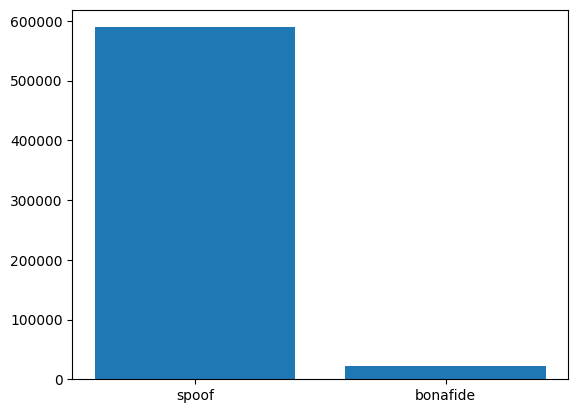

In [10]:
plt.bar(df['Label'].unique(), df['Label'].value_counts())
plt.show()

In [11]:
spoof_data = df[df['Label']=="spoof"]
bonafide_data = df[df['Label']=="bonafide"]

In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [13]:
useful_numeric_columns = [column for column in numeric_columns if len(df[column].value_counts())>1]

dividir los datos de cada tipo de datos en columnas numericas y categoricas

In [14]:
spoof_columns = {"numerical":  spoof_data[numeric_columns], "categorical": spoof_data[categorical_columns]}
bonafide_columns = {"numerical":  bonafide_data[numeric_columns], "categorical": bonafide_data[categorical_columns]}
df_columns = {"numerical":  df[numeric_columns], "categorical": df[categorical_columns]}

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
spoof_columns["numerical"].columns


Index(['duration', 'sample_rate', 'channels', 'bit_depth', 'bitrate',
       'min_blockSize', 'max_blockSize', 'total_samples'],
      dtype='object')

In [17]:
import math

In [18]:
def CreateHistPlots(data):
    # Get the columns with more than one unique value
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        
        ax = sns.histplot(data["numerical"][column], ax=axes[i], kde=True)
        ax.lines[0].set_color('crimson')
        mean_value = data["numerical"][column].mean()
        axes[i].axvline(mean_value, color='blue', linestyle='--', label=f'Mean: {mean_value:.2f}')  # Mean in blue dashed line
        axes[i].set_title(column)
        axes[i].legend()  # Add a legend to indicate the mean line


    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [19]:
def CreateBoxPlots(data):
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        sns.boxplot(y=data["numerical"][column], ax=axes[i])
        axes[i].set_title(column)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [20]:
def CreateViolinPlots(data):
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        sns.violinplot(y=data["numerical"][column], ax=axes[i])
        axes[i].set_title(column)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

## Numerical data analysis

### Whole data

#### - numerical

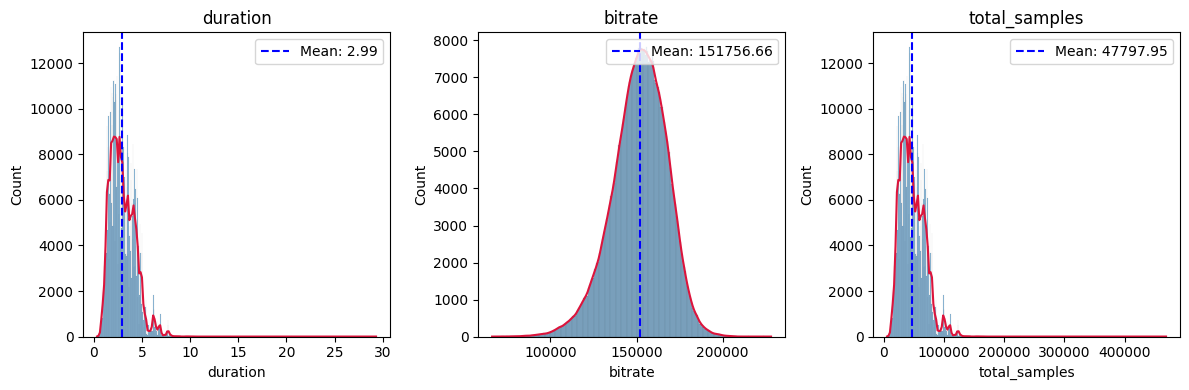

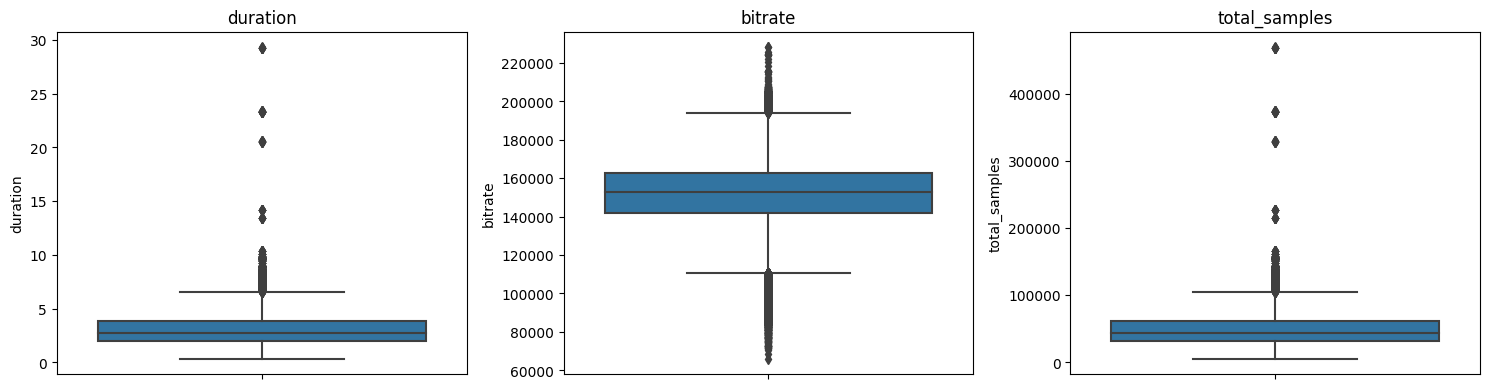

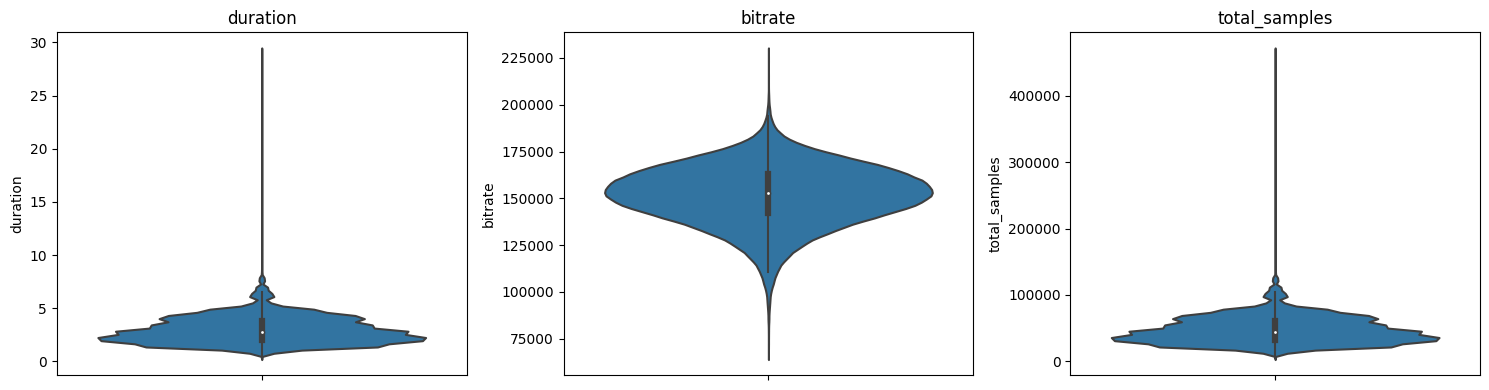

<AxesSubplot:>

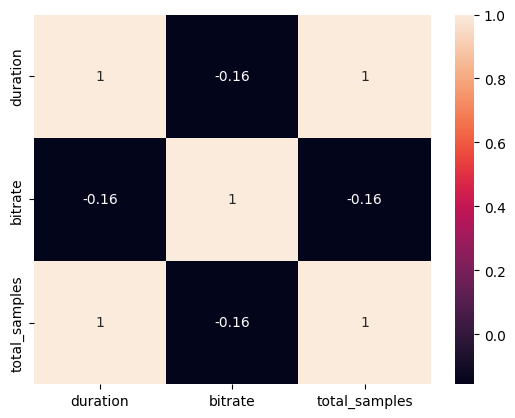

In [21]:
CreateHistPlots(df_columns)
CreateBoxPlots(df_columns)
CreateViolinPlots(df_columns)
sns.heatmap(df_columns["numerical"][useful_numeric_columns].corr(), annot=True)

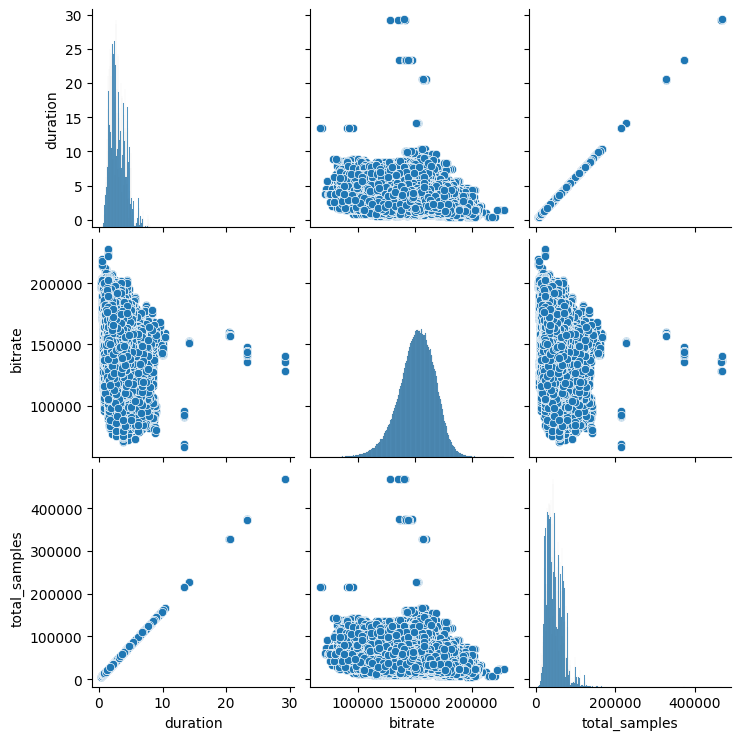

In [30]:
sns.pairplot(df[useful_numeric_columns])

In [33]:
import time

0 0.056998252868652344 22617
1 0.0260007381439209 22616
2 0.03800058364868164 22615
3 0.024999380111694336 22614
4 0.04300117492675781 22613
5 0.06200051307678223 22612
6 0.03499794006347656 22611
7 0.06900238990783691 22610
8 0.041001319885253906 22609
9 0.07399797439575195 22608
10 0.04599714279174805 22607
11 0.03200197219848633 22606
12 0.029999732971191406 22605
13 0.0670022964477539 22604
14 0.030997037887573242 22603
15 0.0540013313293457 22602
16 0.02799844741821289 22601
17 0.04000449180603027 22600
18 0.02999734878540039 22599
19 0.07900285720825195 22598
20 0.04201149940490723 22597
21 0.05499267578125 22596
22 0.04400062561035156 22595
23 0.034050703048706055 22594
24 0.05647635459899902 22593
25 0.10052347183227539 22592
26 0.03226041793823242 22591
27 0.03981351852416992 22590
28 0.05871319770812988 22589
29 0.047661542892456055 22588
30 0.02599787712097168 22587
31 0.06699991226196289 22586
32 0.05100297927856445 22585
33 0.057999372482299805 22584
34 0.06299948692321777

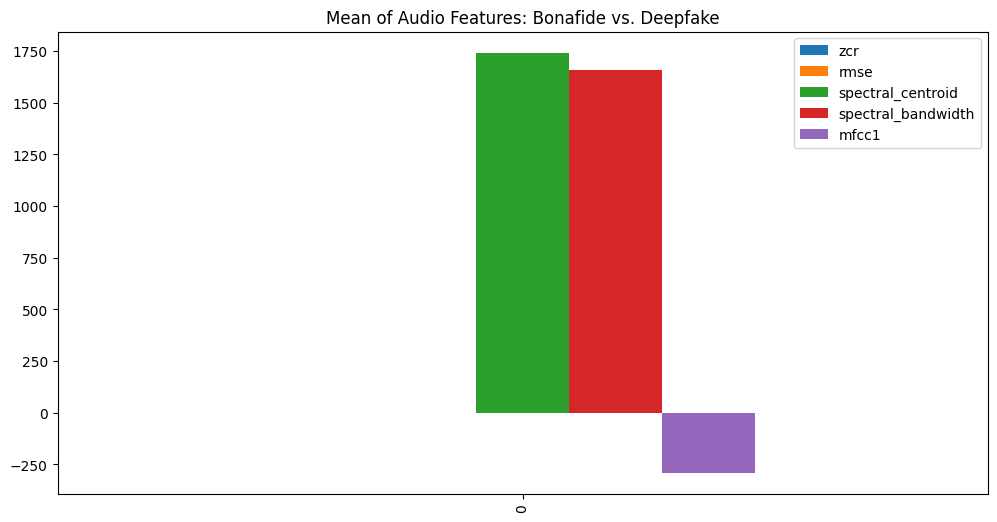

In [37]:

# Function to extract features
def extract_features(y, sr):
    features = {
        'zcr': np.mean(librosa.feature.zero_crossing_rate(y)[0]),
        'rmse': np.mean(librosa.feature.rms(y=y)[0]),
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0]),
        'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]),
        'mfcc1': np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)[0])
    }
    return features

# Initialize list to store features
feature_list = []
count = 0
n = len(bonafide_data)
# Extract and store features
for file_path, label in zip('../'+ bonafide_data['file_path'], bonafide_data['Label']):
    start_time = time.time()
    y, sr = librosa.load(file_path, sr=16000)
    features = extract_features(y, sr)
    features['label'] = label
    feature_list.append(features)
    end_time = time.time()
    print(count, end_time-start_time, n-count)
    count+=1

# Convert to DataFrame
df_features = pd.DataFrame(feature_list)

# Compute and visualize the aggregated statistics
agg_stats = df_features.groupby('label').agg(['mean', 'std']).reset_index()
print(agg_stats)

# Visualize the mean of features for each group
agg_stats_mean = agg_stats.xs('mean', axis=1, level=1)
agg_stats_mean.plot(kind='bar', figsize=(12, 6))
plt.title('Mean of Audio Features: Bonafide vs. Deepfake')
plt.show()


In [135]:
filtered_df = df[(df['duration'] >= 2.0) & (df['duration'] < 4)]
spoof = filtered_df[filtered_df['Label']=='bonafide']
#sns.histplot(spoof['duration'])
spoof

,ASVspoof_ID,VCC_ID,VC_source_VCC_ID,VCTK_ID,VC_source_VCTK_ID,TTS_text,TTS_VC_target_speaker,Speaker_ID,File_ID,Codec,...,file_path,file_name,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
13,DF_E_2000053,VCC2TM2/30017,-,NaN,NaN,-,VCC2TM2,VCC2TM2,DF_E_2000053,mp3m4a,...,data/DF_E_2000053.flac,DF_E_2000053.flac,3.968000,16000,1,16,138169,4096,4096,63488
18,DF_E_2000079,TEM2/E30018,-,NaN,NaN,-,TEM2,TEM2,DF_E_2000079,high_m4a,...,data/DF_E_2000079.flac,DF_E_2000079.flac,2.688000,16000,1,16,143622,4096,4096,43008
113,DF_E_2000503,NaN,NaN,p334_228,-,-,-,LA_0044,DF_E_2000503,high_ogg,...,data/DF_E_2000503.flac,DF_E_2000503.flac,3.256000,16000,1,16,160589,4096,4096,52096
123,DF_E_2000531,VCC2SF3/30010,-,NaN,NaN,-,VCC2SF3,VCC2SF3,DF_E_2000531,oggm4a,...,data/DF_E_2000531.flac,DF_E_2000531.flac,2.624000,16000,1,16,164640,4096,4096,41984
245,DF_E_2001149,NaN,NaN,p287_284,-,-,-,LA_0011,DF_E_2001149,oggm4a,...,data/DF_E_2001149.flac,DF_E_2001149.flac,3.328000,16000,1,16,134064,4096,4096,53248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611714,DF_E_4999380,TGF1/E30023,-,NaN,NaN,-,TGF1,TGF1,DF_E_4999380,nocodec,...,data/DF_E_4999380.flac,DF_E_4999380.flac,3.160500,16000,1,16,165108,4096,4096,50568
611718,DF_E_4999403,NaN,NaN,p283_252,-,-,-,LA_0039,DF_E_4999403,low_mp3,...,data/DF_E_4999403.flac,DF_E_4999403.flac,2.091625,16000,1,16,125035,4096,4096,33466
611748,DF_E_4999576,NaN,NaN,p263_277,-,-,-,LA_0003,DF_E_4999576,low_m4a,...,data/DF_E_4999576.flac,DF_E_4999576.flac,3.648000,16000,1,16,129899,4096,4096,58368
611757,DF_E_4999630,NaN,NaN,p259_266,-,-,-,LA_0018,DF_E_4999630,low_ogg,...,data/DF_E_4999630.flac,DF_E_4999630.flac,2.840000,16000,1,16,141028,4096,4096,45440


In [136]:
filtered_df['Label'].value_counts()

spoof       313910
bonafide     13855
Name: Label, dtype: int64

In [137]:
print(filtered_df['file_path'].iloc[0])

data/DF_E_2000013.flac


3.008


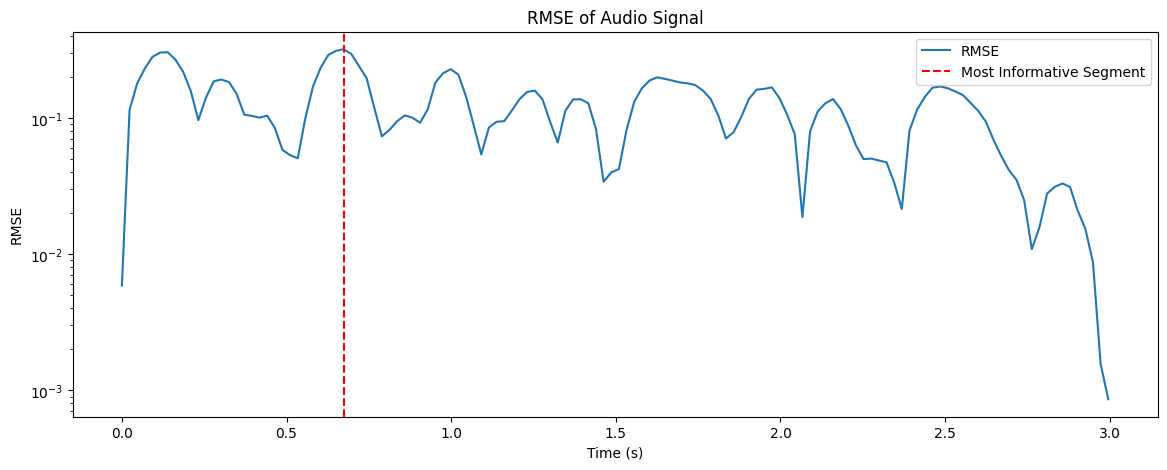

0
2.0
0
44100


In [138]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('../' + filtered_df['file_path'].iloc[2])
print(filtered_df['duration'].iloc[2])

# Compute the RMSE (energy) of the audio
rmse = librosa.feature.rms(y=y)

# Convert the frame index to time
times = librosa.times_like(rmse, sr=sr)

# Find the time index of the maximum RMSE (most energetic segment)
max_energy_index = np.argmax(rmse)

# Identify the corresponding time
most_informative_time = times[max_energy_index]

# Plot the RMSE over time
plt.figure(figsize=(14, 5))
plt.semilogy(times, rmse[0], label='RMSE')
plt.axvline(most_informative_time, color='r', linestyle='--', label='Most Informative Segment')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('RMSE of Audio Signal')
plt.legend()
plt.show()

# Optional: Extract and save the most informative segment
# Define a window around the most informative segment
window_duration = 2.0  # seconds
start_time = 0
end_time = window_duration

print(start_time)
print(end_time)

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

print(start_sample)
print(end_sample)

most_informative_segment = y[start_sample:end_sample]

# Save the segment
import soundfile as sf
sf.write("most_informative_segment.flac", most_informative_segment, sr)
sf.write("original.flac", y, sr)


#### - categorical

In [22]:
useful_categorical_columns = [column for column in categorical_columns if len(df[column].value_counts())<=10]


In [23]:
def CreateBarPlots(data):
    # Get the categorical columns you want to plot
    categorical_columns = useful_categorical_columns[:7]

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(categorical_columns) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot as a count plot
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=data["categorical"][column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability if needed
        
        for p in axes[i].patches:
            value = int(p.get_height())  # Get the height of the bar (the count)
            axes[i].annotate(f'{value}', 
                            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the text at the center of the bar
                            xytext=(0, 5),  # Offset the text a bit upwards
                            textcoords='offset points',
                            ha='center')


    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
        

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

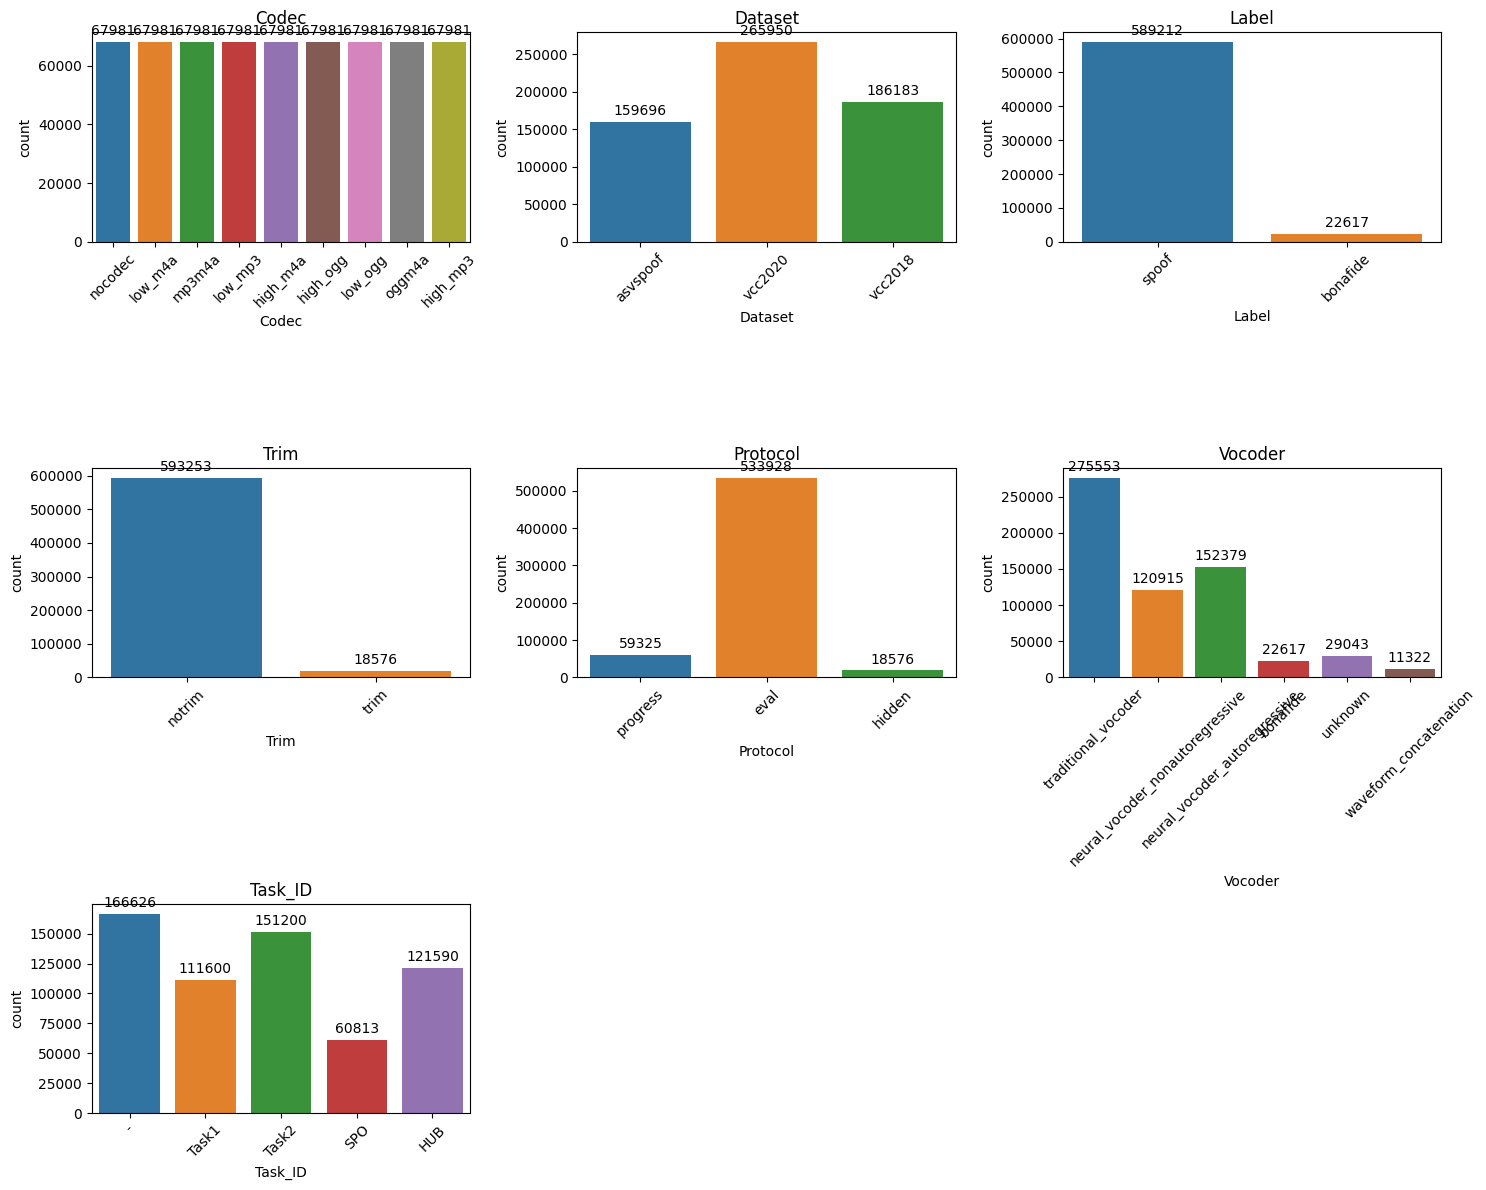

In [24]:
CreateBarPlots(df_columns)

In [25]:
df["Codec"].value_counts()

nocodec     67981
low_m4a     67981
mp3m4a      67981
low_mp3     67981
high_m4a    67981
high_ogg    67981
low_ogg     67981
oggm4a      67981
high_mp3    67981
Name: Codec, dtype: int64

### Spoof

#### - numerical

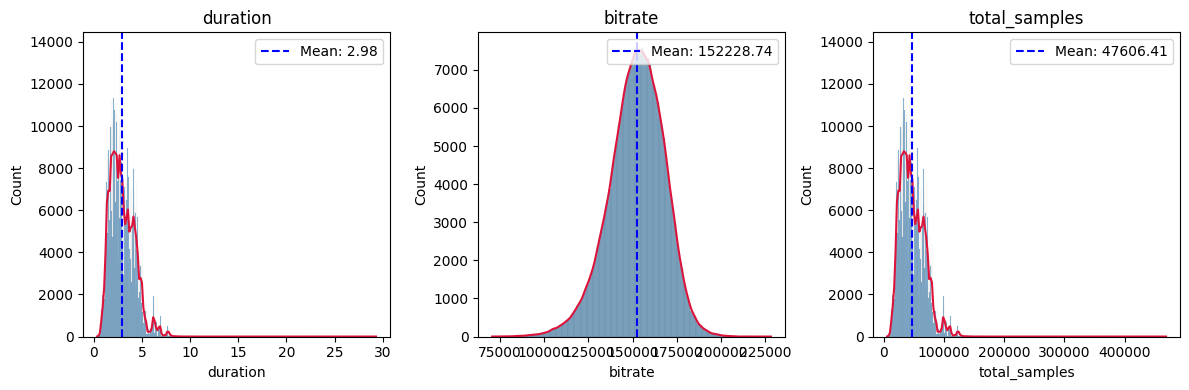

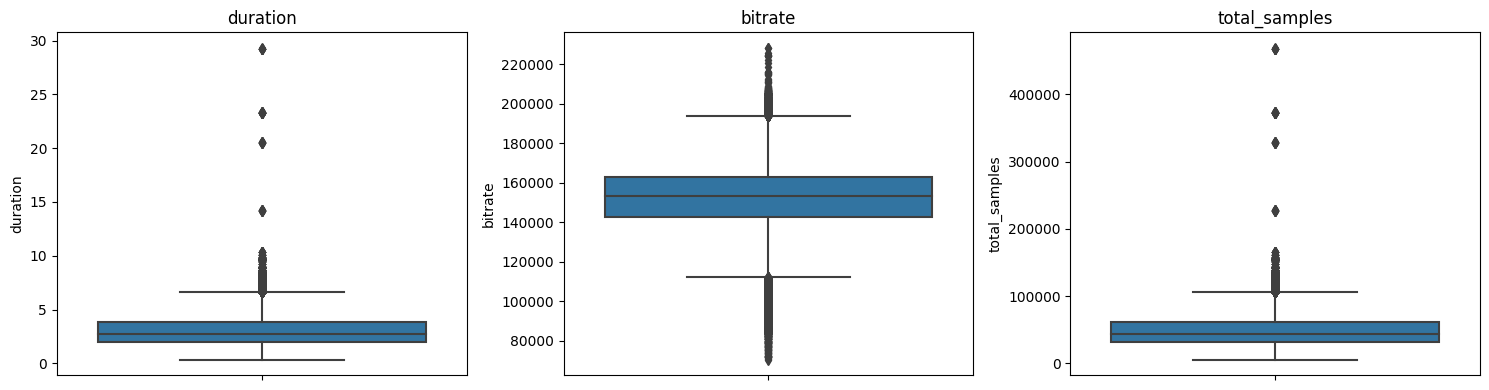

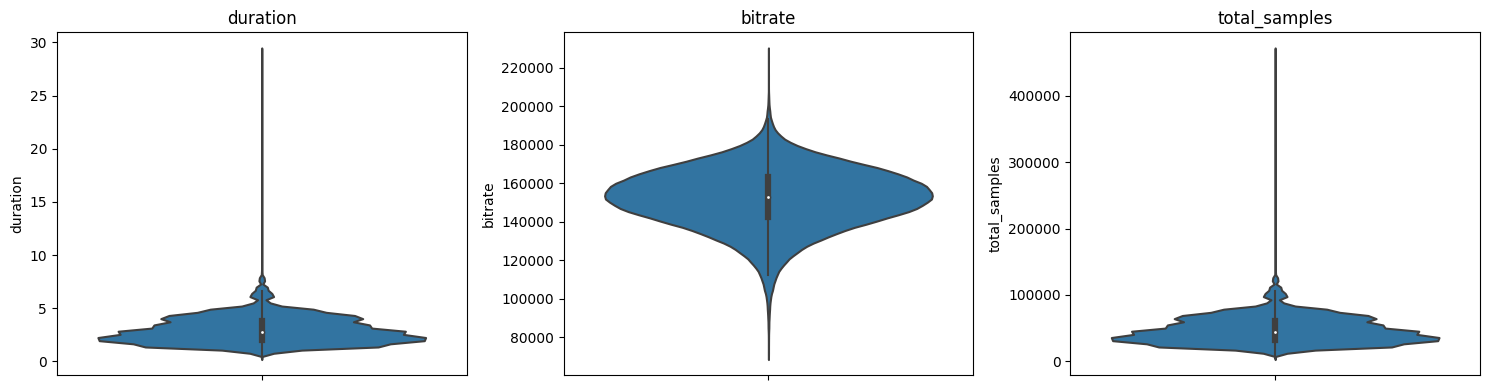

<AxesSubplot:>

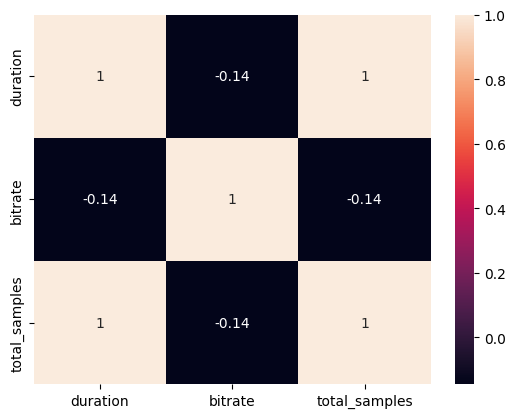

In [26]:
CreateHistPlots(spoof_columns)
CreateBoxPlots(spoof_columns)
CreateViolinPlots(spoof_columns)
sns.heatmap(spoof_columns["numerical"][useful_numeric_columns].corr(), annot=True)

### Bonafide

#### - numerical

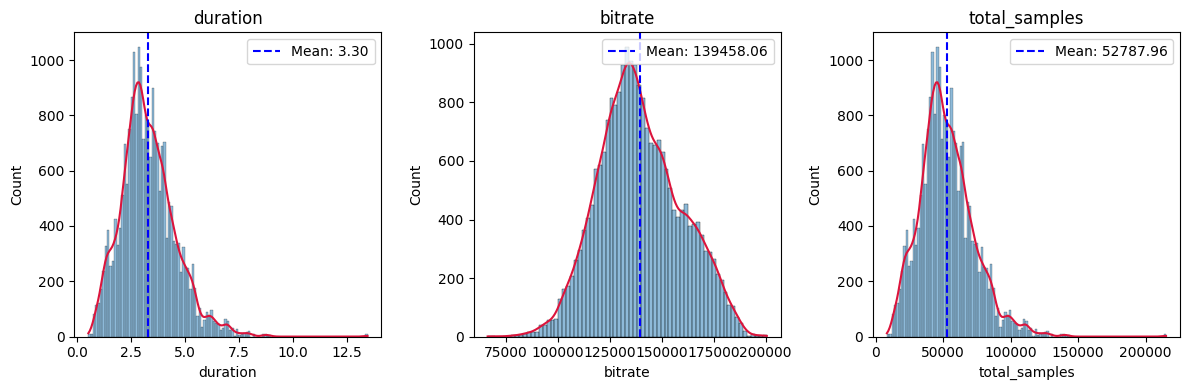

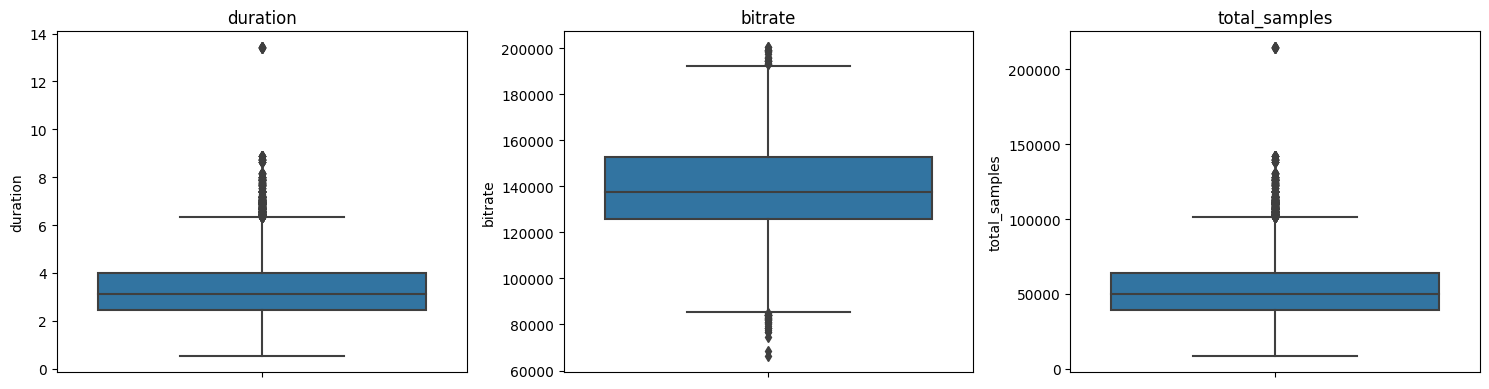

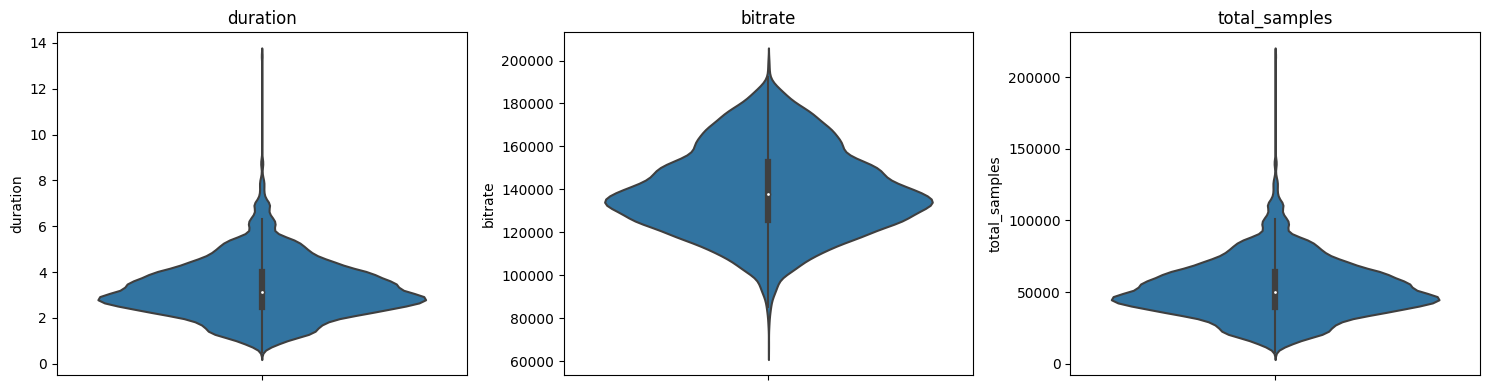

<AxesSubplot:>

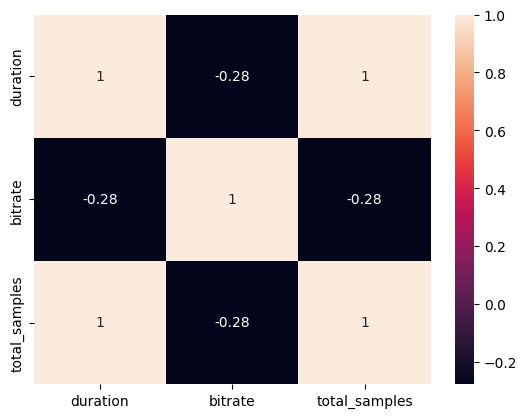

In [27]:
CreateHistPlots(bonafide_columns)
CreateBoxPlots(bonafide_columns)
CreateViolinPlots(bonafide_columns)
sns.heatmap(bonafide_columns["numerical"][useful_numeric_columns].corr(), annot=True)

<AxesSubplot:>

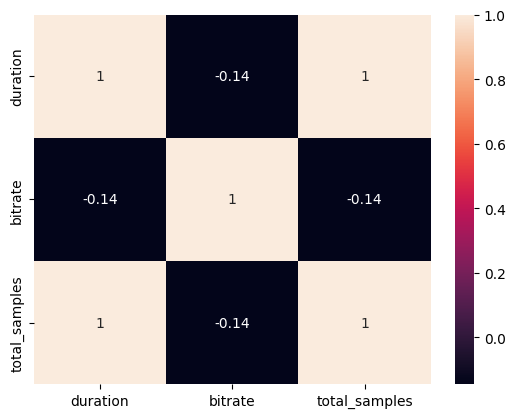

In [28]:
sns.heatmap(spoof_columns["numerical"][useful_numeric_columns].corr(), annot=True)

In [29]:
b_heatmap = bonafide_columns["numerical"][useful_numeric_columns].corr()
sn

NameError: name 'sn' is not defined

In [ ]:
df[useful_numeric_columns].corr()

,duration,bitrate,total_samples
duration,1.00000,-0.15612,1.00000
bitrate,-0.15612,1.00000,-0.15612
total_samples,1.00000,-0.15612,1.00000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Distribution of 'Label' column (Spoof vs. Genuine):
spoof       589212
bonafide     22617
Name: Label, dtype: int64


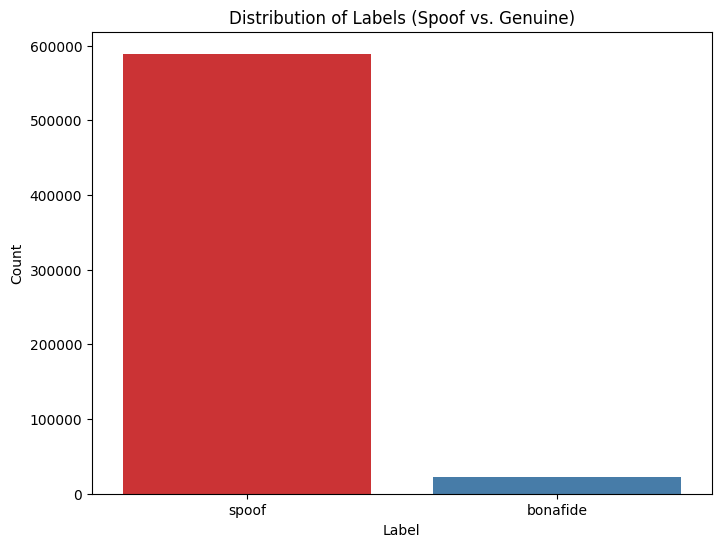

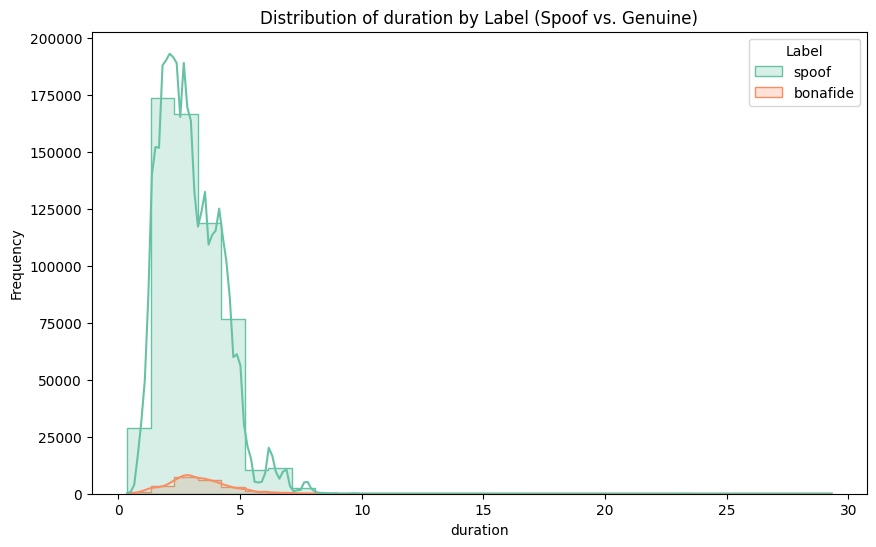

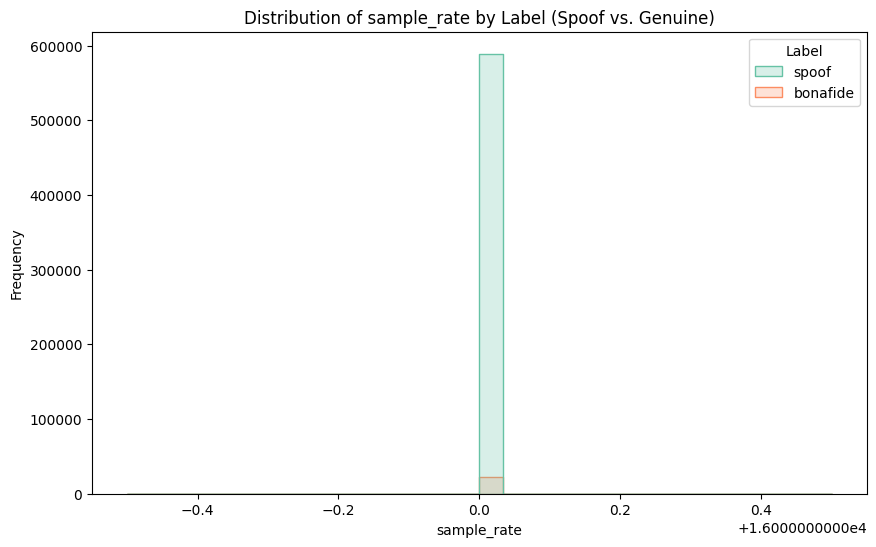

LinAlgError: singular matrix

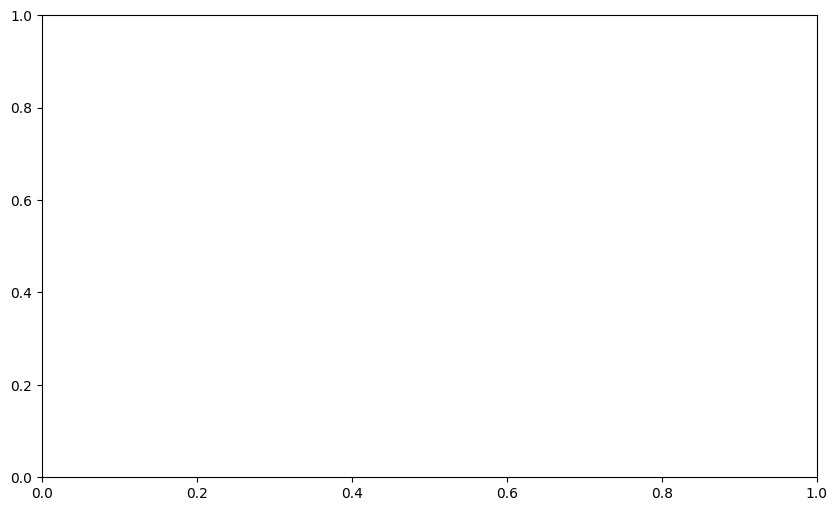

In [ ]:


# Analyzing the 'Label' column to check for the distribution of spoofed vs genuine data
if 'Label' in df.columns:
    print("\nDistribution of 'Label' column (Spoof vs. Genuine):")
    print(df['Label'].value_counts())

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Label', data=df, palette='Set1')
    plt.title('Distribution of Labels (Spoof vs. Genuine)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

    # Histograms of numerical variables depending on whether the data is spoofed or not
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, hue='Label', kde=True, bins=30, palette='Set2', element='step')
        plt.title(f'Distribution of {col} by Label (Spoof vs. Genuine)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Boxplots of numerical variables to compare distributions between spoofed and genuine
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Label', y=col, data=df, palette='Set3')
        plt.title(f'Boxplot of {col} by Label (Spoof vs. Genuine)')
        plt.xlabel('Label')
        plt.ylabel(col)
        plt.show()

    # Correlation between numeric variables, separated by Label
    genuine_data = df[df['Label'] == 'genuine']
    spoof_data = df[df['Label'] == 'spoof']

    plt.figure(figsize=(14, 7))
    sns.heatmap(genuine_data[numeric_columns].corr(), annot=True, cmap='Blues')
    plt.title('Correlation Heatmap (Genuine Data)')
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.heatmap(spoof_data[numeric_columns].corr(), annot=True, cmap='Reds')
    plt.title('Correlation Heatmap (Spoof Data)')
    plt.show()

    # Analysis of categorical variables (if they exist) in relation to Label
    for col in categorical_columns:
        if col != 'Label':
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, hue='Label', data=df, palette='Set1', order=df[col].value_counts().index)
            plt.title(f'Distribution of {col} by Label (Spoof vs. Genuine)')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.show()

            # Cross-tabulation analysis
            print(f"\nCross-tabulation of 'Label' with '{col}':")
            cross_tab = pd.crosstab(df['Label'], df[col], normalize='index')
            print(cross_tab)

            cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
            plt.title(f"Cross-tabulation: 'Label' Across {col}")
            plt.ylabel('Proportion')
            plt.show()

    # Advanced Analysis: Interaction between two categorical variables and their relationship with 'Label'
    for i, cat_col1 in enumerate(categorical_columns):
        for cat_col2 in categorical_columns[i+1:]:
            if cat_col1 != 'Label' and cat_col2 != 'Label':
                print(f"\nInteraction between {cat_col1} and {cat_col2}:")
                interaction = pd.crosstab([df[cat_col1], df[cat_col2]], df['Label'], normalize='index')
                print(interaction)

                interaction.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Accent')
                plt.title(f"Interaction between {cat_col1} and {cat_col2} by Label")
                plt.ylabel('Proportion')
                plt.show()

# Final Summary: Key Insights and Anomalies Detected
print("\nFinal Summary and Key Insights:")

In [ ]:
bonafide_data["sample_rate"].value_counts()
spoof_data["sample_rate"].value_counts()

16000    589212
Name: sample_rate, dtype: int64